### Part 1

In [7]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

<Axes: title={'center': 'Patient has Heart Attack'}, xlabel='Binary Label', ylabel='Frequency'>

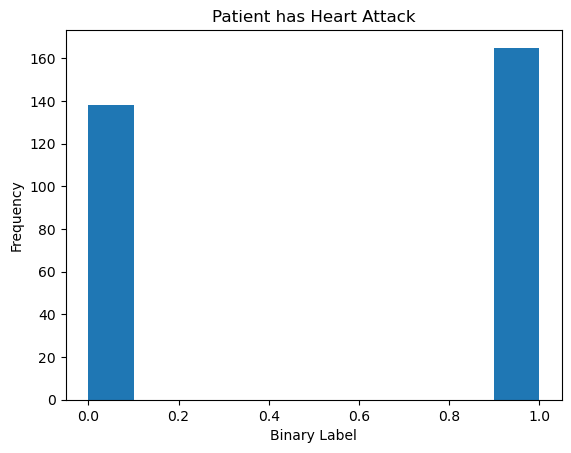

In [11]:
# Load Heart Attack Analysis and Prediction Dataset 
df = pd.read_csv("heart.csv")

# Distribution of Target Variable
df['output'].plot(kind='hist', title='Patient has Heart Attack', xlabel='Binary Label')

<Axes: title={'center': 'Distribution of Resting Heart Pressure'}, xlabel='Resting Heart Pressure', ylabel='Frequency'>

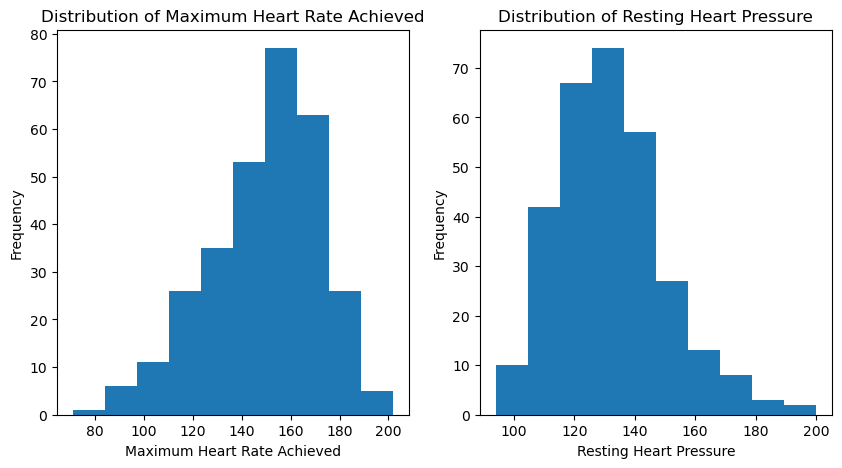

In [14]:
# Distribution of some predictors 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df['thalachh'].plot(kind='hist', ax=ax[0], title='Distribution of Maximum Heart Rate Achieved', xlabel='Maximum Heart Rate Achieved')
df['trtbps'].plot(kind='hist', ax=ax[1], title='Distribution of Resting Heart Pressure', xlabel='Resting Heart Pressure')

In [28]:
# PyMC model specification
y = df['output'].values.reshape(-1, 1) # target
X = df[["age", "thalachh", "trtbps", "chol"]].values # predictors

n, p = y.shape[0], X.shape[1]

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1)) # betas specification
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # sigma half-normal specification
    y = pm.Bernoulli('y', logit_p=pm.math.sigmoid(pm.math.dot(X, betas)), observed= y) # Logit link function in producing outcome, y

with MLR:
    idata = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 692 seconds.


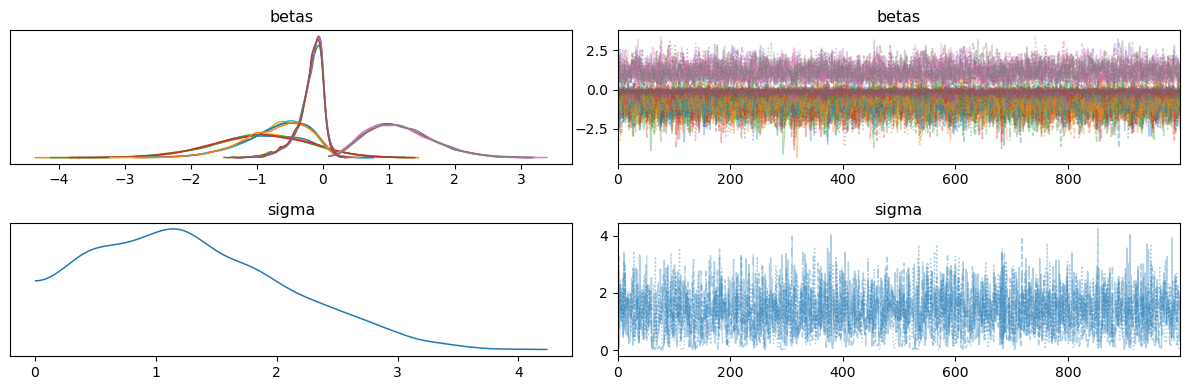

In [29]:
az.plot_trace(idata, combined=True);
plt.tight_layout()

### Part 2 - Using priors to create regularizers

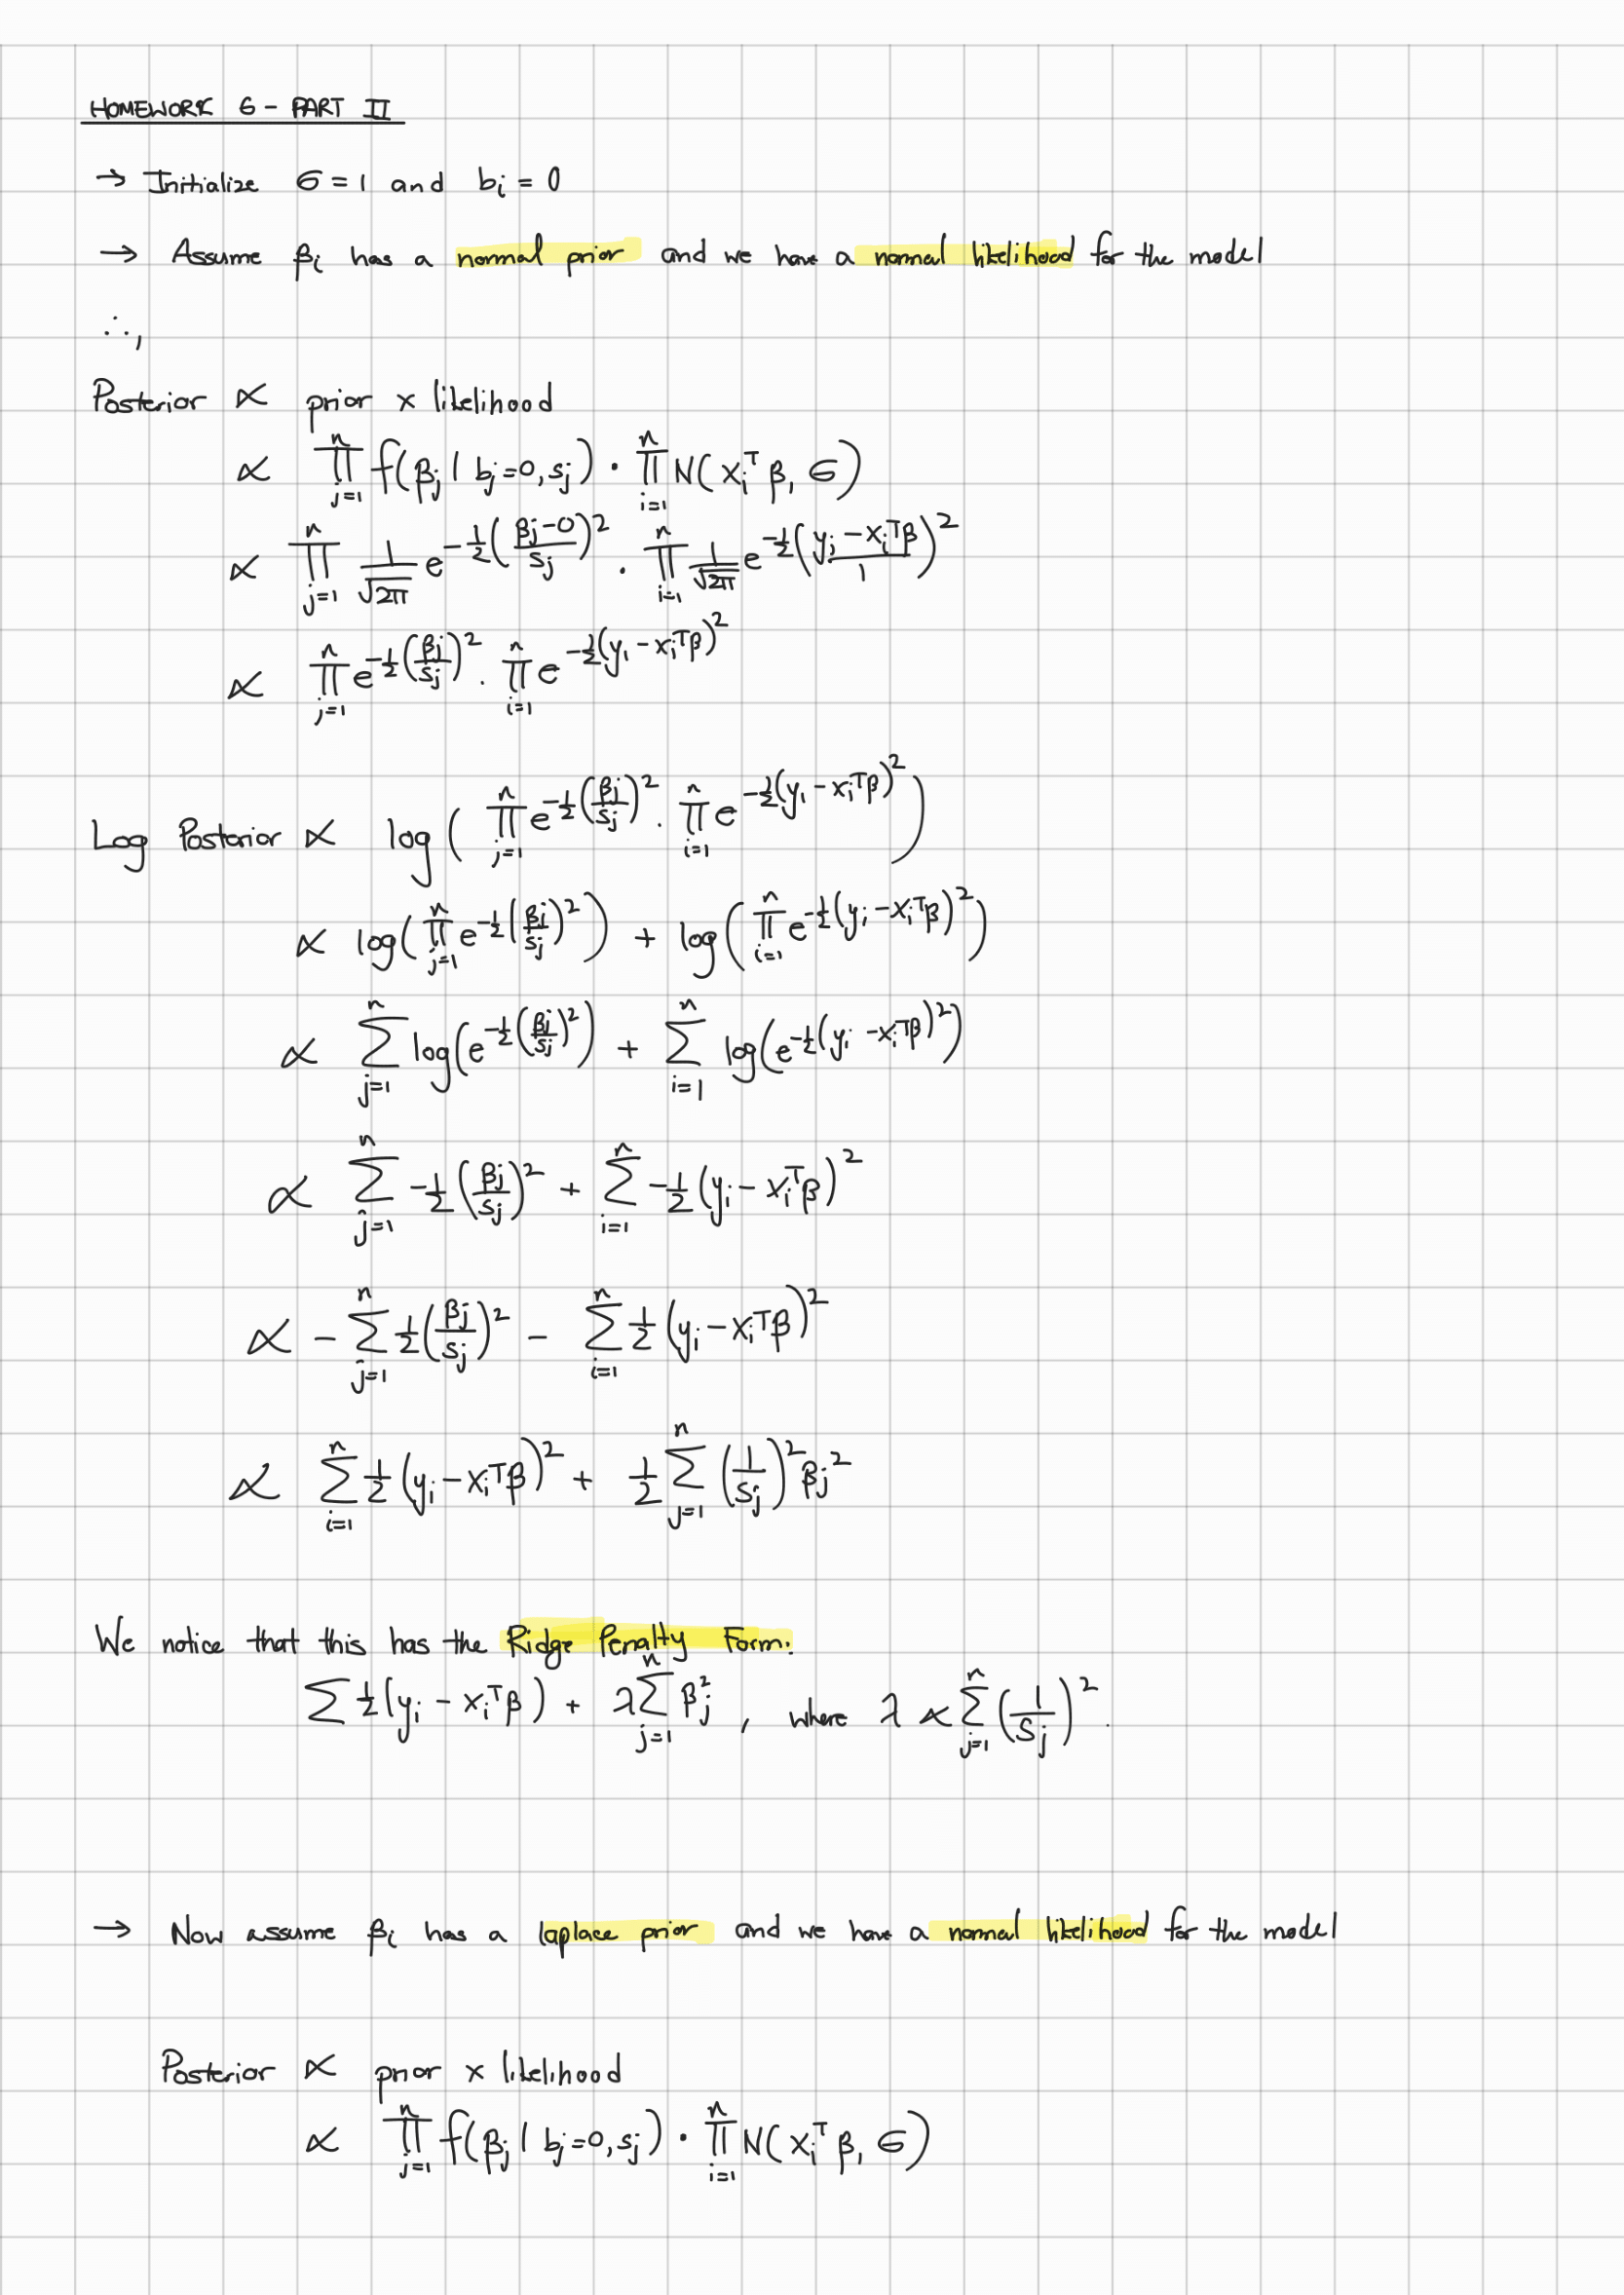

In [4]:
from IPython.display import Image

# Embed PDF in a Jupyter Notebook cell
Image("HW6 - Part 22.png", width=800, height=500)

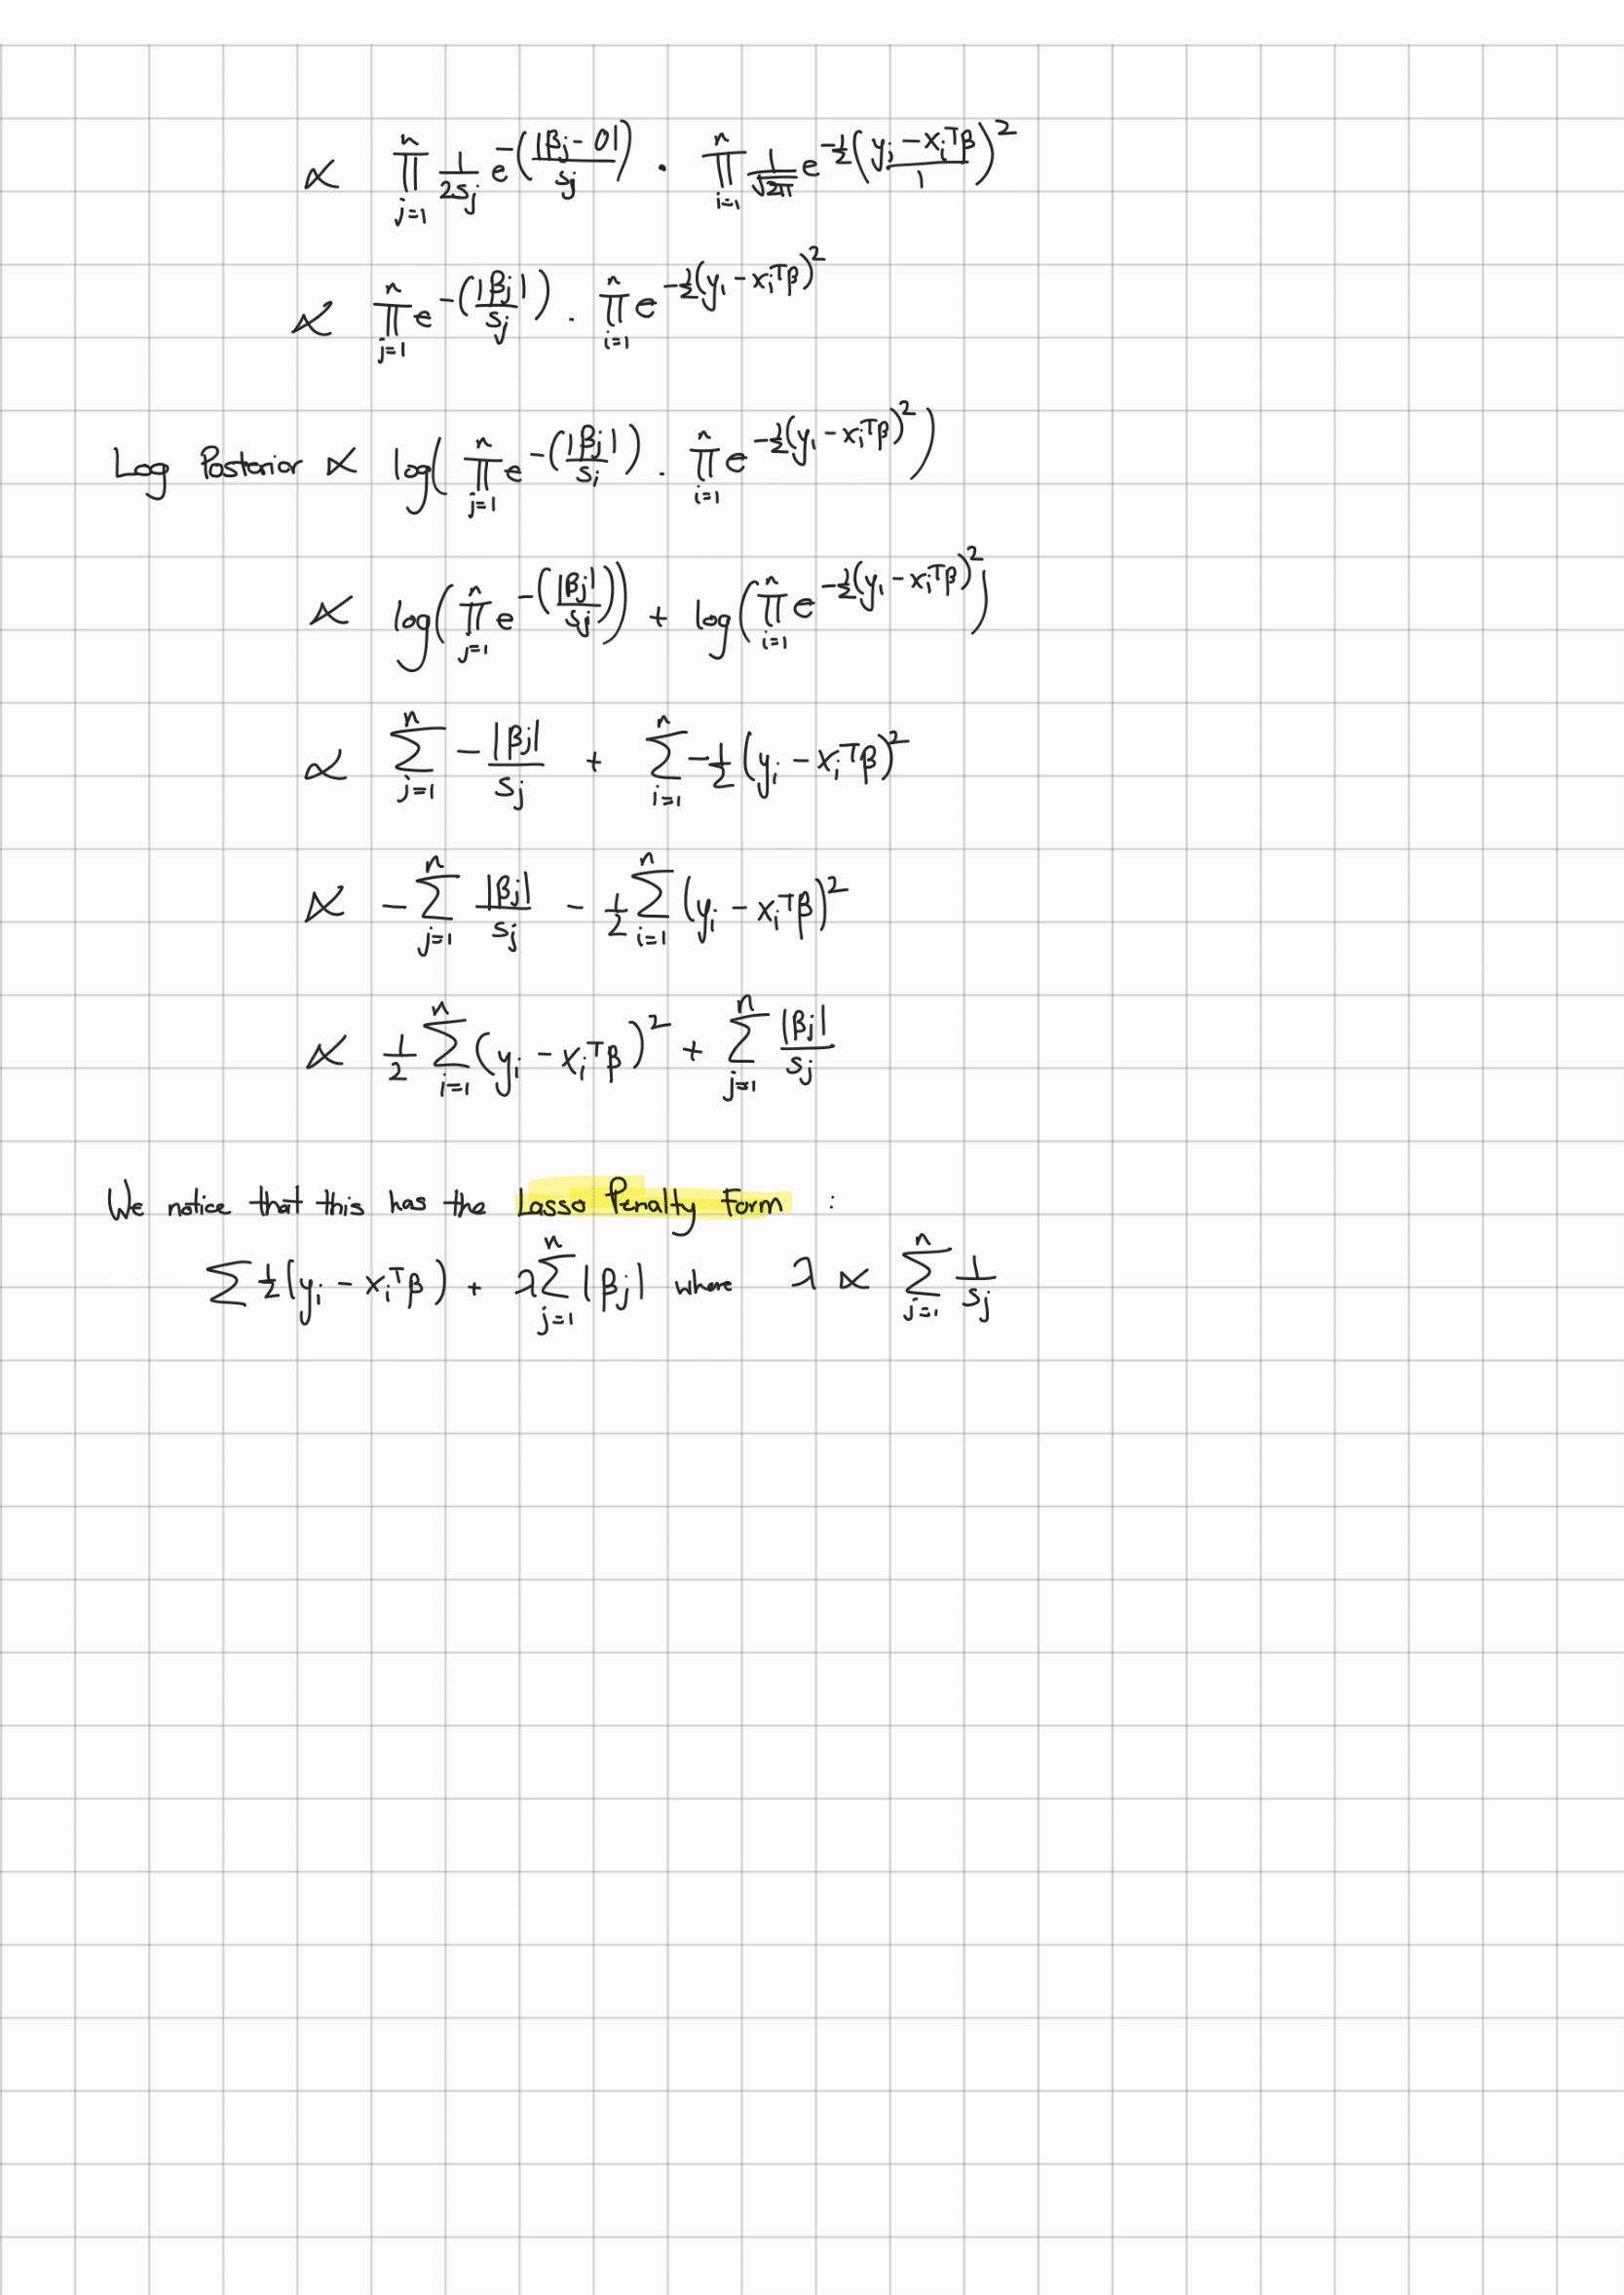

In [5]:
Image("HW6 - Part21.png", width=800, height=500)

"Bayesians do not optimize posterior distributions, they sample from them; but, the posterior distributions are nonetheless 'regularizations' of the likelihood through the prior"

The process of combining the prior and the likelihood to get the posterior can be seen as a form of regularization. Regularization is a concept from machine learning that involves adding information or constraints to prevent overfitting and improve the generalization of the model. In Bayesian inference, the prior acts as a regularization term by biasing the solution towards plausible values based on our prior beliefs. This helps to mitigate the risk of overfitting to the observed data, especially when the data is limited or noisy. Thus, Bayesians do not 'optimize' or 'minimize' loss functions in the way that the ML community does. 